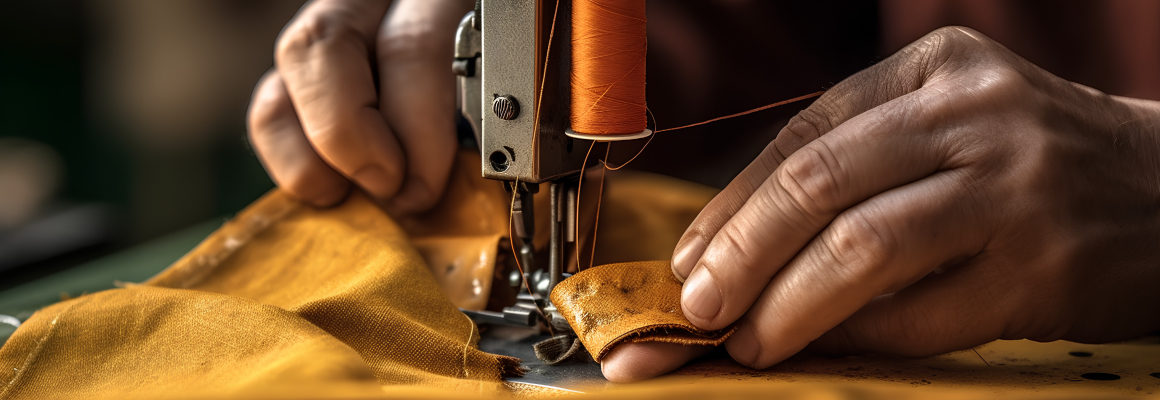


# Predicting Employee Productivity with Tree Models

The fashion industry, as well as the wardrobes of consumers, rely heavily on the production of garments. Employee efficiency is a major factor of profits for clothing factories, and they are interested in learning more about what makes them efficient. Today we will be using decision trees and random forest models to make predictions on whether or not employees will meet their production goals. The goal is to create a model with at least 70% accuracy. We're working with a dataset from the UCI Machine learning repository which can be found here: https://archive.ics.uci.edu/dataset/597/productivity+prediction+of+garment+employees

In [3]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# read in data
df = pd.read_csv('garments_worker_productivity.csv')

# view first few rows of data
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [4]:
# view information about columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

### Columns:
- date: date in MM-DD-YYYY

- quarter: a portion of the month — month was divided into quarters

- department: sewing or finishing department

- day: day of the week

- team: team number

- targeted_productivity: the productivity the team is aiming for

- smv: standard minute value — the amount of time given for a task

- wip: work in progress — the number of unfinished items

- over_time: minutes of overtime worked

- incentive: the financial incentive (in BDT) to complete a task

- idle_time: amount of time that production was interrupted

- idle_men: number of workers who were idle because of an interruption

- no_of_style_change: number of changes in the style of a particular product

- no_of_workers: number of workers on each team

- actual_productivity: the actual % of productivity that was delivered by the workers — it ranges from 0 to 1.

We will further examine this dataset and see what conclusions we can draw.

In [6]:
# view statistics of columns
df.describe(include='all')

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197,1197,1197,1197,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
unique,59,5,3,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,3/11/2015,Quarter1,sweing,Wednesday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,24,360,691,208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,NaN,NaN,NaN,NaN,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,NaN,NaN,NaN,NaN,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,NaN,NaN,NaN,NaN,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,NaN,NaN,NaN,NaN,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,NaN,NaN,NaN,NaN,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253


In [7]:
# count the number of missing values in each column
df.isnull().sum()

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

The wip column has many missing values and the columns for idle time and idle men appear to mostly have values of 0, so these columns might not be of use to us. The department column has three unique values, but we expect only two, finishing and sewing. Next we will compare the frequencies of targeted and actual productivity.

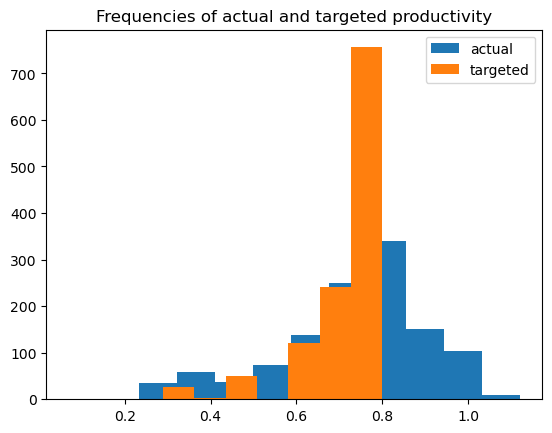

In [9]:
# targeted and actual productivity frequencies
plt.hist(df['actual_productivity'], label='actual')
plt.hist(df['targeted_productivity'], label='targeted')
plt.legend()
plt.title('Frequencies of actual and targeted productivity')

plt.show()

The target productivity is never above 80%, but the actual productivity has a distribution centered at around 80%.

### Data Cleaning

Next we will clean our data and prepare it to use in our model. There are more departments listed than we were expecting, so we will take a look at them.

In [12]:
df['department'].value_counts()

department
sweing        691
finishing     257
finishing     249
Name: count, dtype: int64

There are two groups for the finishing department, one of which has white space at the end. We will remove the space and fix the spelling error for the sewing group.

In [14]:
# remove space
df['department'] = df['department'].str.strip()

# fix spelling error
df.loc[df['department'] == 'sweing', 'department'] = 'sewing'

# check updated departments
df['department'].value_counts()

department
sewing       691
finishing    506
Name: count, dtype: int64

The department column has been fixed. Next we will see how many times there are idle workers and idle time. If it's extremely rare, we will not use this column.

In [16]:
# count occurrences
print('Instances of idle workers: ', df[df['idle_men'] != 0].shape[0])
print('Instances of idle time: ', df[df['idle_time'] != 0].shape[0])

Instances of idle workers:  18
Instances of idle time:  18


Next we will be removing the columns which are unnecessary for our analysis. We will remove date since we are not interested in individual days. We will remove idle men and idle time columns because there are only 18 nonzero values. We will remove the wip column since there are so many missing values.

In [18]:
# remove unwanted columns
removals = ['date', 'wip', 'idle_time', 'idle_men']
df_clean = df.drop(removals, axis=1)

Next we will create our target variable. This will be whether or not the productivity goal was met.

In [20]:
# create new column for target variable
df_clean['productive'] = df_clean['actual_productivity'] >= df_clean['targeted_productivity']

# view frequencies of target variable
df_clean['productive'].value_counts()

productive
True     875
False    322
Name: count, dtype: int64

The majority of cases show that the productivity goal was met.

Next we will change the categorical columns to numeric columns. We'll convert department to integers, 0 for finishing and 1 for sewing. Then we will use dummy variables to convert quarter and day.

In [23]:
# map department column
df_clean['department'] = df_clean['department'].map({'finishing':0, 'sewing':1})
df_clean = df_clean.rename(columns={'department':'department_sew'})

# dummy variables for quarter and day
df_clean = pd.get_dummies(df_clean)

# view changes
df_clean.head()

,department_sew,team,targeted_productivity,smv,over_time,incentive,no_of_style_change,no_of_workers,actual_productivity,productive,...,quarter_Quarter2,quarter_Quarter3,quarter_Quarter4,quarter_Quarter5,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
0,1,8,0.80,26.16,7080,98,0,59.0,0.940725,True,...,False,False,False,False,False,False,False,True,False,False
1,0,1,0.75,3.94,960,0,0,8.0,0.886500,True,...,False,False,False,False,False,False,False,True,False,False
2,1,11,0.80,11.41,3660,50,0,30.5,0.800570,True,...,False,False,False,False,False,False,False,True,False,False
3,1,12,0.80,11.41,3660,50,0,30.5,0.800570,True,...,False,False,False,False,False,False,False,True,False,False
4,1,6,0.80,25.90,1920,50,0,56.0,0.800382,True,...,False,False,False,False,False,False,False,True,False,False


### Building the Decision Tree
Now the data has been prepared for machine learning and we can begin with modeling. We'll split our data into a training set to teach the model and a test set to evaluate its accuracy. We will be using a classification tree model because we have separated our outcomes into two different classes, whether or not the productivity goal was met.

In [25]:
# import scikit-learn libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# split data into test and training sets
X = df_clean.drop(['productive', 'actual_productivity'], axis=1)
y = df_clean['productive']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=13)

# instantiate classification tree
class_tree = DecisionTreeClassifier(max_depth=3, random_state=13)

# fit to training data
class_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=13)

### Visualizing the decision tree
Below we will plot the tree so we can see how it's put together. The image below shows us the structure of the tree and which decisions it will use.

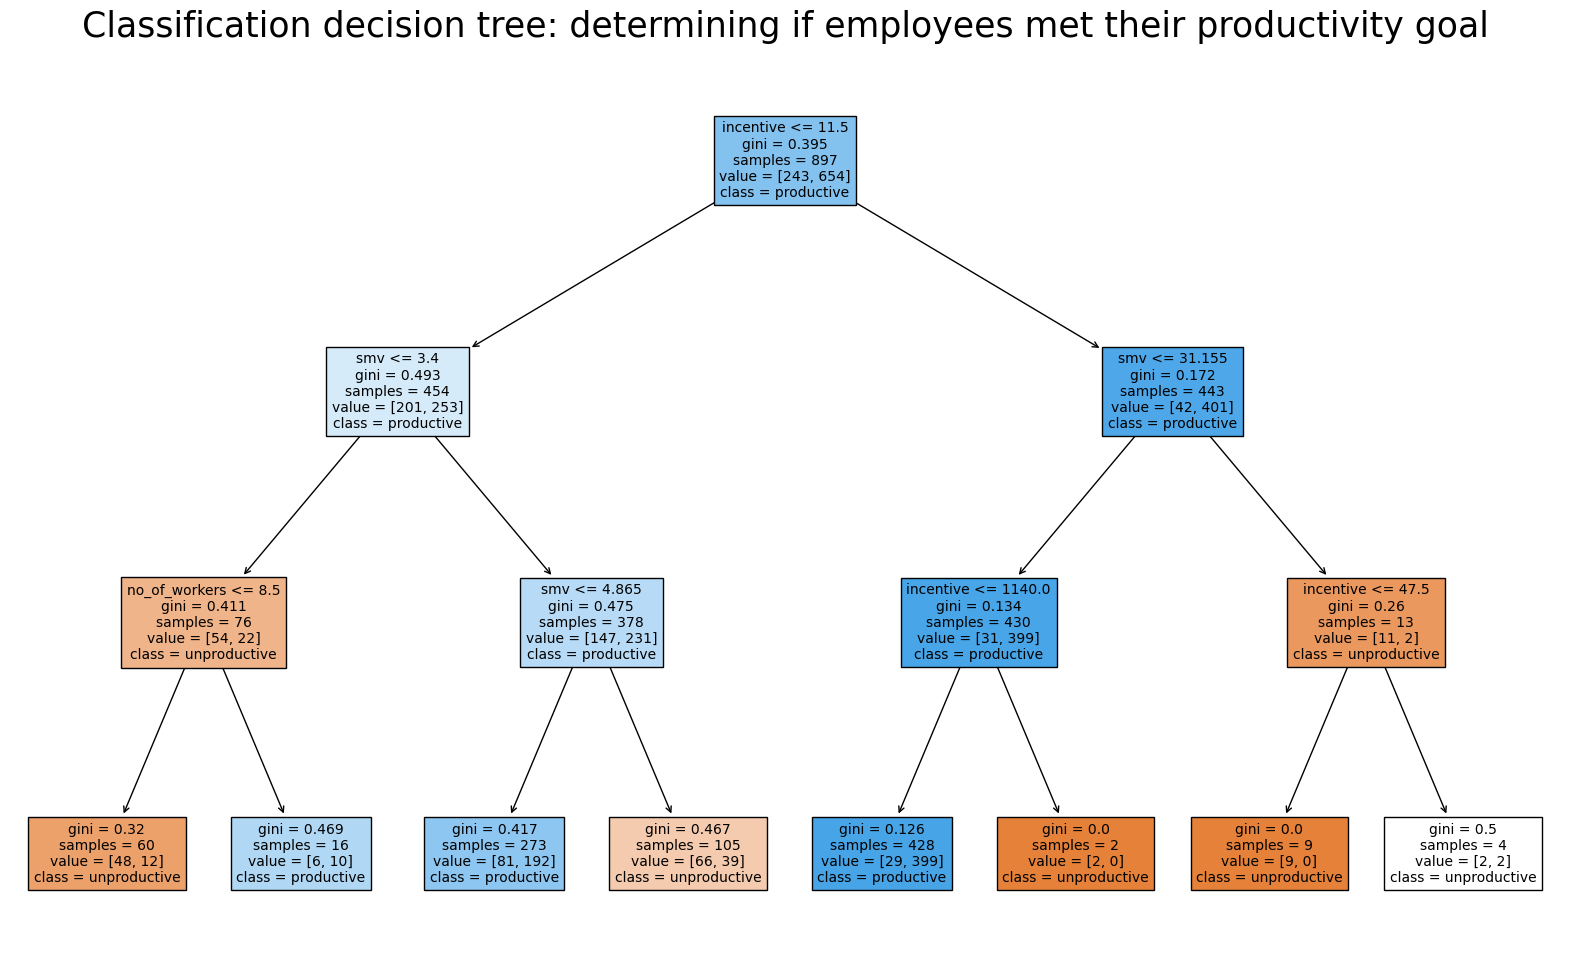

In [27]:
# plot the tree
from sklearn.tree import plot_tree

plt.figure(figsize=(20,12))

plot_tree(class_tree, 
          feature_names=list(X.columns), 
          fontsize=10, filled=True, 
          class_names=['unproductive', 'productive'])

plt.title('Classification decision tree: determining if employees met their productivity goal', size=25)

plt.show()

### Evaluating the decision tree

Now we will try out our model and see how good it is, using both the test and training sets.

In [29]:
# evaluate accuracy of tree
from sklearn.metrics import accuracy_score

# calculate test set accuracy
score = class_tree.score(X_test, y_test)
print('Test accuracy:  ', score)

# calculate training set accuracy
train_score = class_tree.score(X_train, y_train)
print('Train accuracy: ', train_score)

Test accuracy:   0.8266666666666667
Train accuracy:  0.8115942028985508


The accuracy of the model on the training data and the test data are very close, which implies that the model is well fit to the data without being overfit. We were aiming for an accuracy of 70%, and we have created a model with 82.7% accuracy.

### Explaining the decision tree
Next we will describe what a decision tree is and what information we can learn from the tree we just created. 

A decision tree is much like a game of twenty questions. You look at the characteristics of something, and by asking yes or no questions about those characteristics, you learn enough about it to guess what it might be. Right now we are looking at the productivity in a particular scenario, with characteristics like which team and how many workers. By asking questions about the characteristics of this scenario, we decide if we think that the workers were more or less productive than their goal. Note that our decision tree does not ask every single question possible, but simply the more important questions. That means that it won't be right every time, but it can make decisions much faster and it will avoid overfitting the model.<br>

It's named a decision tree because it's in the shape of an upside down tree, and the different possibilities branch out in different directions, until it ends in the row of outcomes, which we call leaves.<br>

In our tree, the most important qualities were incentive (money offered for a task) and smv (time given for a task). In one of the branches we are also looking at the number of employees. This means that to predict whether a certain situation will meet productivity goals, we want to ask questions about financial incentives and time given for tasks. If a business wishes to increase the productivity of its workers, these are probably good choices for making changes.<br><br>

Let's look at an example. Here is what happened in one situation:

In [33]:
# print example
df.loc[13]

date                      1/1/2015
quarter                   Quarter1
department               finishing
day                       Thursday
team                            10
targeted_productivity         0.65
smv                           3.94
wip                            NaN
over_time                      960
incentive                        0
idle_time                      0.0
idle_men                         0
no_of_style_change               0
no_of_workers                  8.0
actual_productivity       0.705917
Name: 13, dtype: object

Above, we can see all the information that we get when looking at a situation. We're only interested in incentive (0), time given for tasks (3.94), and possibly the number of workers (8). Let's walk through how we use our tree for this situation. <br><br>

At the top of our tree, the root, we ask ourselves whether incentive is <= 11.5, which is true because in our case it is 0. The arrows beneath the first node show us where to go next based on that condition, and if it's true we go left and if it's false we go right. Since this is true, we go left to our next question. We ask ourselves if smv <= 3.92, which in our case is false because it's 3.94. We move to the right to the next question. Is the smv value <= 4.865? Yes it is, which means we take the path to the left. This brings us to the leaf with our final prediction. Based on the answers we've just given about the characteristics of this situation, we think that in this case the workers were productive and did meet or exceed their productivity goal. Since the desired productivity was .65, and the actual productivity was .71, they did meet their goal and our prediction was accurate.

### Random forest
Next we will create a random forest model and compare it to our tree model. A random forest model randomly creates a large number of decision trees, and picks out the best one. If it finds a better tree, then the random forest model is superior. If it has the same accuracy as the single tree, then we already have an optimal model and will stick with the single tree.

In [36]:
# import scikit-learn libraries
from sklearn.ensemble import RandomForestClassifier

# instantiate and fit random forest
random_forest = RandomForestClassifier(random_state=13)
random_forest.fit(X_train, y_train)

# determine how well our model performed
score = random_forest.score(X_test, y_test)
predictions = random_forest.predict(X_test)
print('score = ', score)


score =  0.86


Here we can see that using the random forest slightly increased the accuracy of our model, taking it from 82.7% to 86% accuracy. This is an example of a random forest creating a better model than a single tree.

### Conclusion

We have created decision tree and random forest models to predict employee productivity. Using our random forest model, we have an accuracy of 86%, which surpasses our goal of 70%. We have created a decision tree, visualized it, and seen its inner workings.